<a href="https://colab.research.google.com/github/YasaminRhd/Pythonia.init/blob/main/Session%2010%20%7C%20Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/datasets_11956_16450_international-airline-passengers.csv')
training_set = dataset.iloc[0:100,1:2].values
test_set = dataset.iloc[100:144,1:2].values
whole_set = dataset.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
whole_set_scaled = sc.fit_transform(whole_set)

In [ ]:
x_train = whole_set_scaled[0:100, 0:1]
y_train = whole_set_scaled[0:100, 0:1]
x_test = whole_set_scaled[100:144, 0:1]
y_test = whole_set_scaled[100:144, 0:1]

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

# LSTM first layer
model.add(LSTM(units=5, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# LSTM second layer
model.add(LSTM(units=2, return_sequences=False))
# Dense ourput layer
model.add(Dense(units=1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit
model.fit(x_train, y_train, epochs=200, batch_size=3, validation_data=(x_test, y_test))

Epoch 1/200
34/34 [==============================] - 6s 40ms/step - loss: 0.2647 - val_loss: 1.0332
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1865 - val_loss: 1.0806
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 0.2065 - val_loss: 1.1288
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1745 - val_loss: 1.1686
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1466 - val_loss: 1.2005
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1285 - val_loss: 1.2087
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 1.2007
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1288 - val_loss: 1.1688
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1120 - val_loss: 1.1308
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1029 - val_loss: 1.0789
Epoch 11

In [ ]:
x_test_pred = model.predict(x_test)

In [ ]:
x_train_pred = model.predict(x_train)

In [ ]:
x_train_pred = np.reshape(x_train_pred, (-1, 1))
x_train_pred = sc.inverse_transform(x_train_pred)
x_test_pred = sc.inverse_transform(x_test_pred)

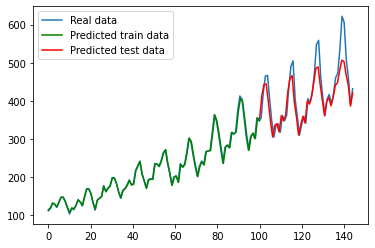

In [ ]:
whole_set = dataset.iloc[0:144,1:2].values

xAxis = np.linspace(0, 144, 144)
plt.plot(xAxis, whole_set, label='Real data')
xAxis = np.linspace(0, 100, num=100)
plt.plot(xAxis, x_train_pred, 'green', label='Predicted train data')
xAxis = np.linspace(100, 144, 44)
plt.plot(xAxis, x_test_pred, 'red', label='Predicted test data')
plt.legend()
plt.show()